Data Science Fundamentals: R |
[Table of Contents](../index.ipynb)
- - - 
<!--NAVIGATION-->
Module 16. [Exploratory Data Analysis Using Models](./00.ipynb) | [Model Basics](./01.ipynb) | [Model Building](./02.ipynb) | [Exercises](./03.ipynb)

# Model Basics

![images](images/slides6.png)

In [2]:
install.packages("modelr")


The downloaded binary packages are in
	/var/folders/39/rw094bh97s1fm7lfmg_nwcxm0000gn/T//RtmpSCovr9/downloaded_packages


In [16]:
library(modelr)
library(tidyverse)

## Defining A Family Of Models

Toy dataset: ```sim1```, contained in package ```modelr```.

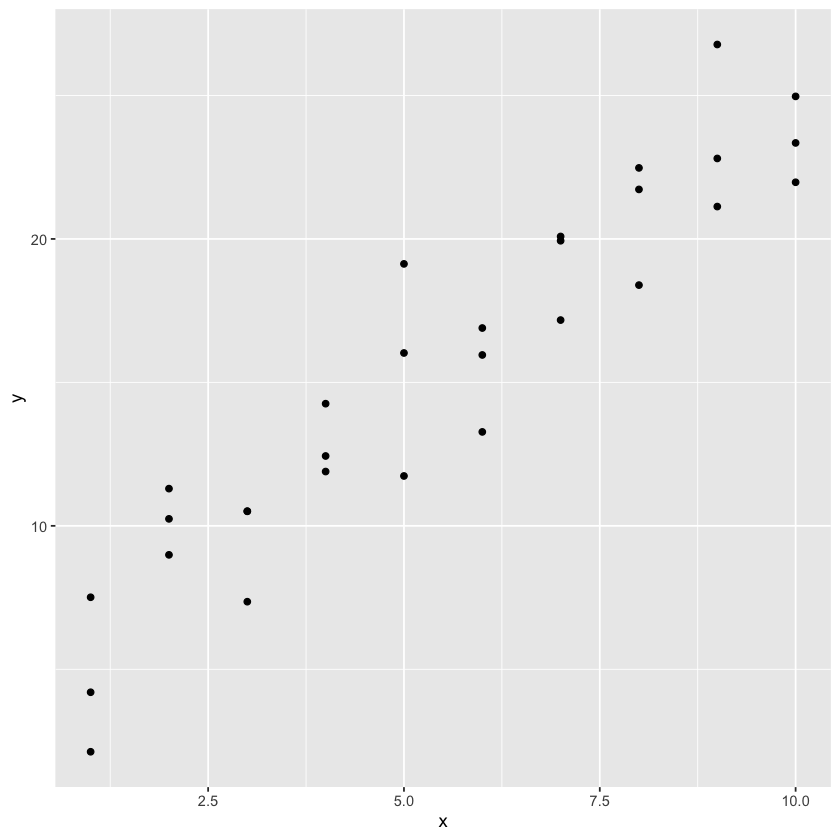

In [6]:
ggplot(sim1, aes(x, y)) + geom_point()

Use a model to capture this pattern and make it explict.

![images](images/slides7.png)

![images](images/slides8.png)

## Making Predictions

First, generate a grid of values covering the region where our data lies. 

In [36]:
sim1_mod <- lm(y ~ x, data=sim1)
coef(sim1_mod)

(Intercept)           x 
   4.220822    2.051533

In [37]:
grid <- sim1 %>% 
  data_grid(x) 
grid

x 
1   1
2   2
3   3
4   4
5   5
6   6
7   7
8   8
9   9
10 10

This finds unique values for each variables and generates all combinations.

Now make predictions (using ```modelr```) and add them to the grid data frame.

In [40]:
grid <- grid %>% add_predictions(sim1_mod)

In [41]:
grid

x  pred     
1   1  6.272355
2   2  8.323888
3   3 10.375421
4   4 12.426954
5   5 14.478487
6   6 16.530020
7   7 18.581553
8   8 20.633087
9   9 22.684620
10 10 24.736153

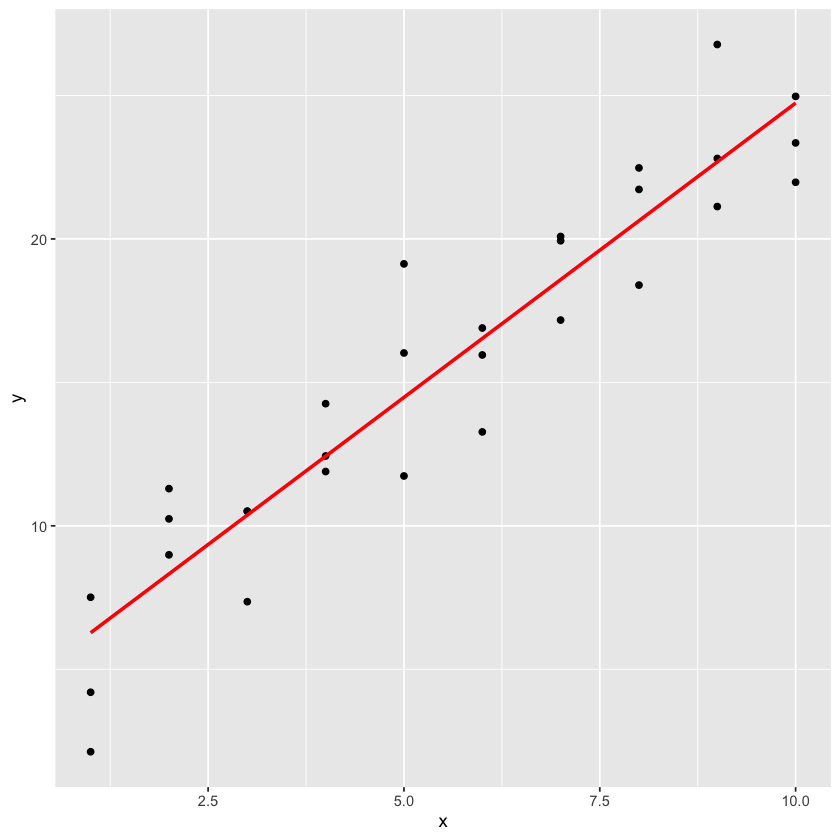

In [42]:
ggplot(sim1, aes(x)) + geom_point(aes(y = y)) +
  geom_line(aes(y = pred), data = grid, color = "red", size = 1)

## What are Model Residuals? 

Residuals in a statistical or machine learning model are the differences between observed and predicted values of data. They are a diagnostic measure used when assessing the quality of a model. <i>They are also known as errors.</i>

## Visualizing The Residuals

Add residuals to data with ```add_residuals()``` from package ```modelr```.

In [43]:
sim1 <- sim1 %>% add_residuals(sim1_mod)

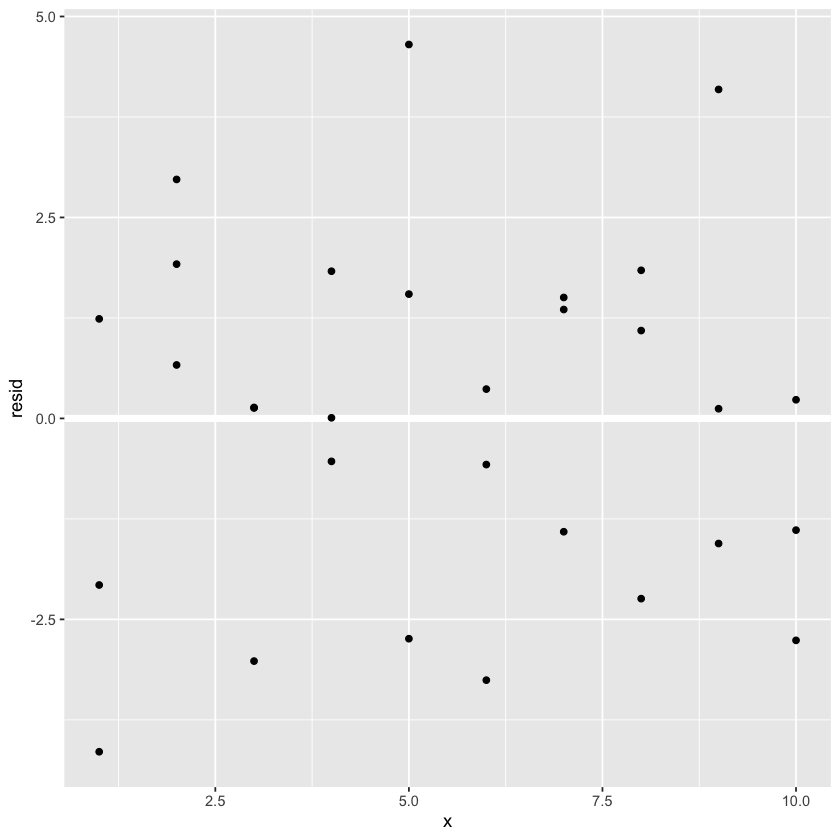

In [44]:
# we can recreate the plot using the residuals instead of y.
ggplot(sim1, aes(x, resid)) + geom_ref_line(h = 0) + geom_point()

![images](images/slides9.png)

![images](images/slides10.png)

## Formulas With Interactions

In the ```sim3``` dataset, there is a categorical and a continuous predictor.

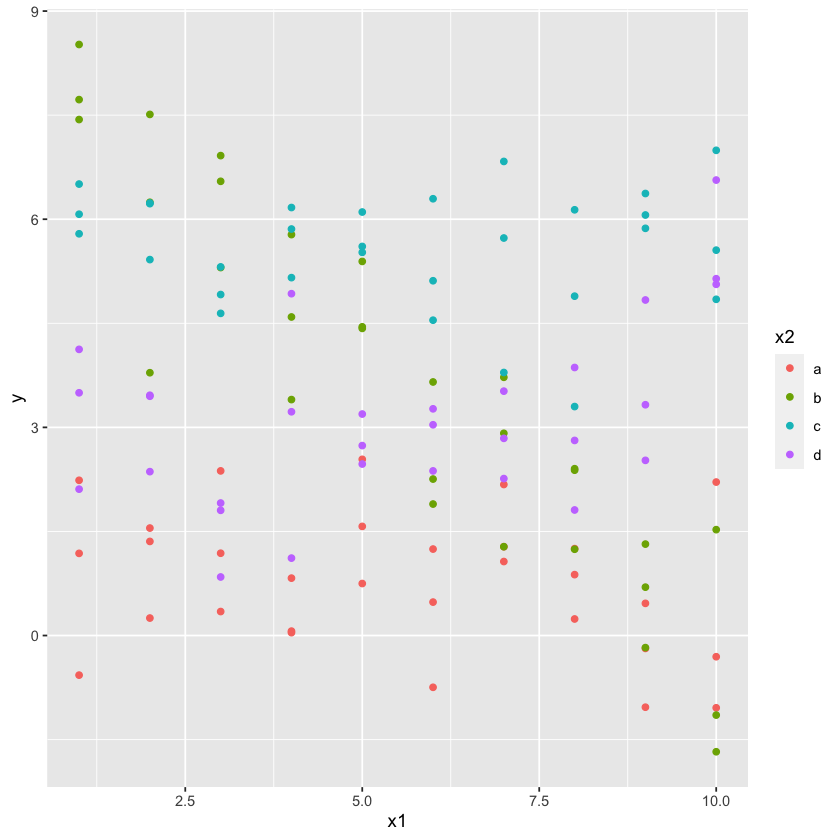

In [46]:
ggplot(sim3, aes(x=x1, y=y)) + geom_point(aes(color = x2))

In [48]:
#we could fit two different models
mod1 <- lm(y ~ x1 + x2, data = sim3) # model without interactions
mod2 <- lm(y ~ x1 * x2, data = sim3) # model with interactions

## Models with Interactions

In [49]:
grid <- sim3 %>% data_grid(x1, x2) %>% # data grid for two variables
  gather_predictions(mod1, mod2)       # predictions from both models

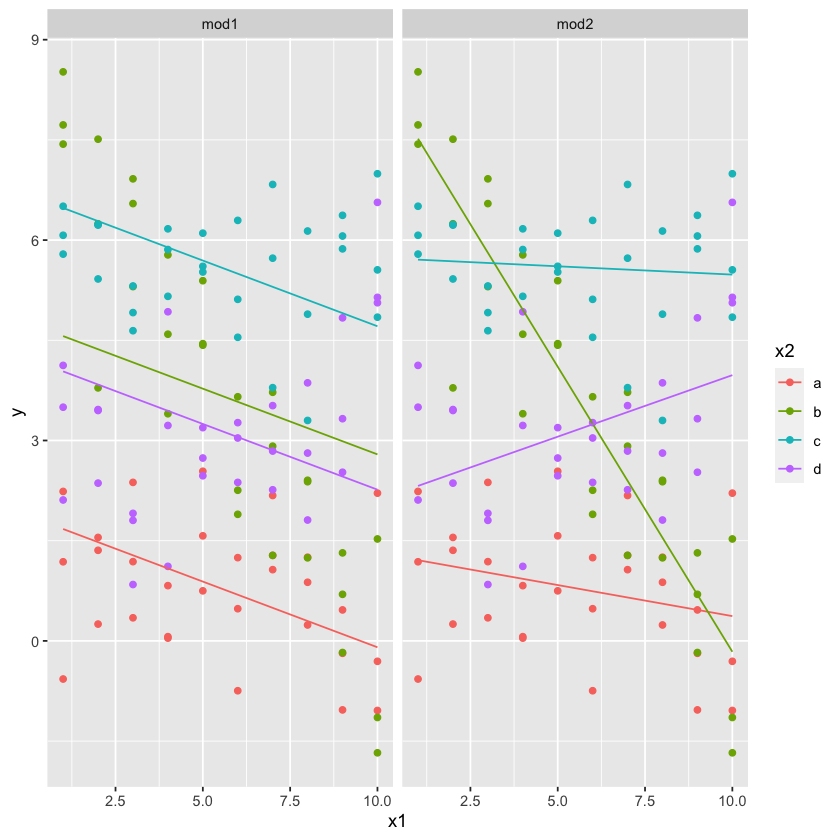

In [50]:
ggplot(sim3, aes(x=x1, y=y, color=x2)) + 
  geom_point() +                       # plot data points
  geom_line(data=grid, aes(y=pred)) +  # add predictions for each model
  facet_wrap(~ model )                 # show one plot for each model

The model that uses * has a different slope and intercept for each line.

## Residuals with Interactions

Which model should we choose?  Let's look at the residuals.  

In [51]:
sim3 <- sim3 %>% gather_residuals(mod1, mod2)

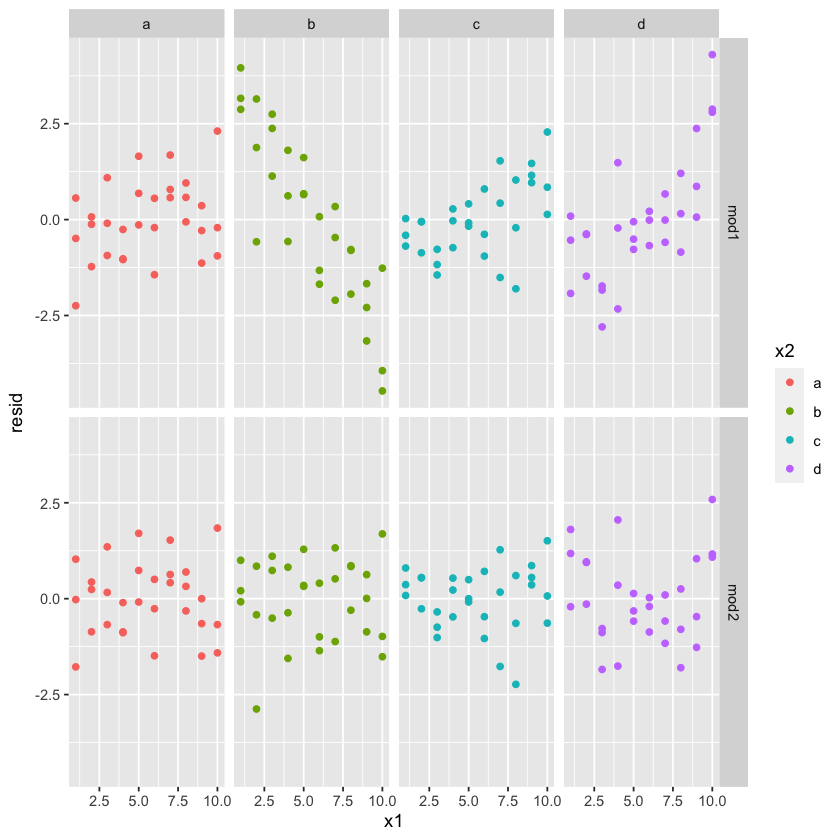

In [52]:
ggplot(sim3, aes(x=x1, y=resid, color = x2)) +
  geom_point() + facet_grid(model ~ x2)

There is little obvious pattern in the residuals for ```mod2```.

## What Are Interactions?  

In statistics, an interaction may arise when considering the relationship among three or more variables, and describes a situation in which the effect of one causal variable on an outcome depends on the state of a second causal variable (that is, when effects of the two causes are not additive). Although commonly thought of in terms of causal relationships, the concept of an interaction can also describe non-causal associations. Interactions are often considered in the context of regression analyses or factorial experiments.

The presence of interactions can have important implications for the interpretation of statistical models. If two variables of interest interact, the relationship between each of the interacting variables and a third "dependent variable" depends on the value of the other interacting variable. In practice, this makes it more difficult to predict the consequences of changing the value of a variable, particularly if the variables it interacts with are hard to measure or difficult to control.

The notion of "interaction" is closely related to that of moderation that is common in social and health science research: the interaction between an explanatory variable and an environmental variable suggests that the effect of the explanatory variable has been moderated or modified by the environmental variable.

## Interactions of Continuous Variables

In the ```sim4``` dataset, there are two continuous predictors.

In [55]:
p1 <- ggplot(sim4, aes(x=x1, y=y)) + geom_point(aes(color = x2))

In [56]:
p2 <- ggplot(sim4, aes(x=x2, y=y)) + geom_point(aes(color = x1))

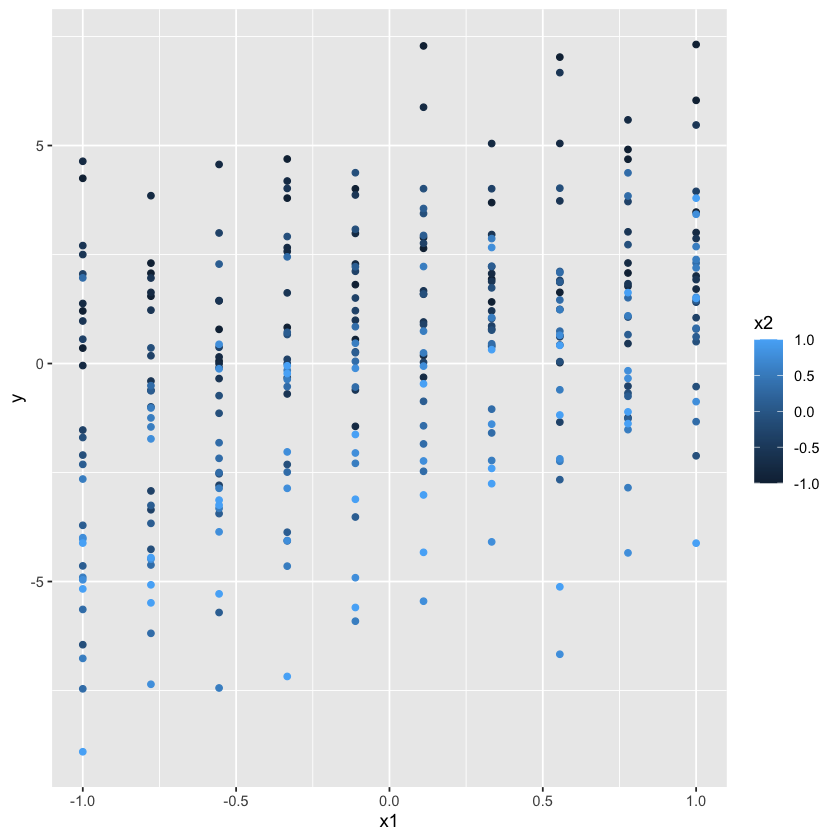

In [57]:
p1

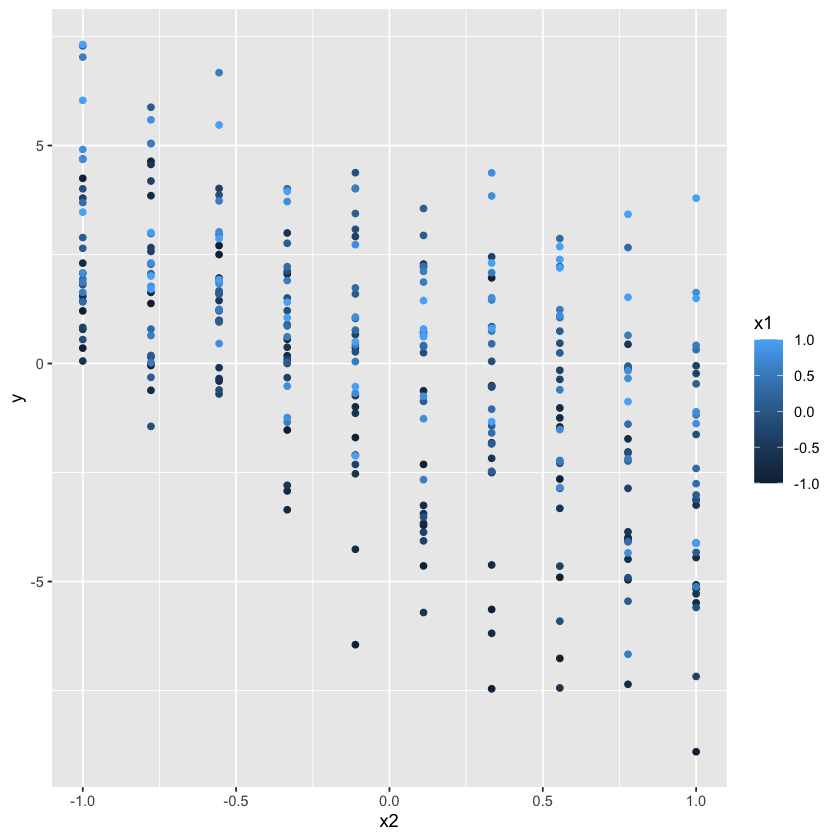

In [58]:
p2

In [60]:
# interactions models can be fit in the same way as before
mod1 <- lm(y ~ x1 + x2, data = sim4)  # model without interactions
mod2 <- lm(y ~ x1 * x2, data = sim4) # model with interactions

![images](images/slides11.png)

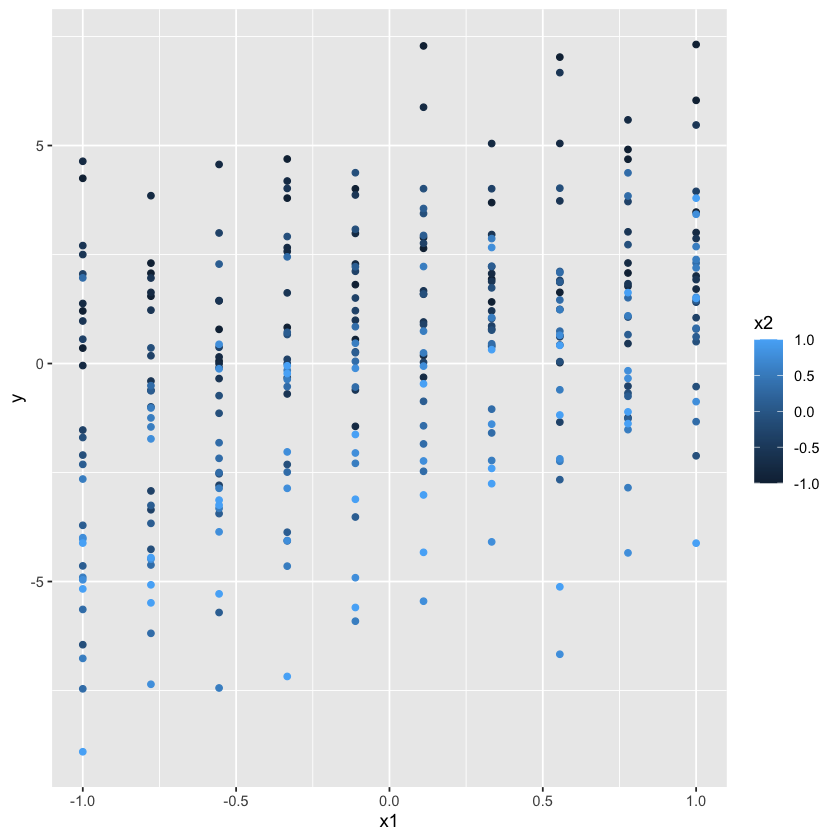

In [63]:
p1

![images](images/slides12.png)

In [64]:
(df <- tribble(~y, ~x, 
                1, 1,
                2, 2, 
                3, 3))

y x
1 1 1
2 2 2
3 3 3

In [65]:
model_matrix(df, y ~ x + I(x^2))

(Intercept) x I(x^2)
1 1           1 1     
2 1           2 4     
3 1           3 9

In [66]:
model_matrix(df, y ~ x + log(x))

(Intercept) x log(x)   
1 1           1 0.0000000
2 1           2 0.6931472
3 1           3 1.0986123

![images](images/slides13.png)

## Approximating Non-Linear Functions (Example)

Approximating with orthogonal polynomials of different degrees.

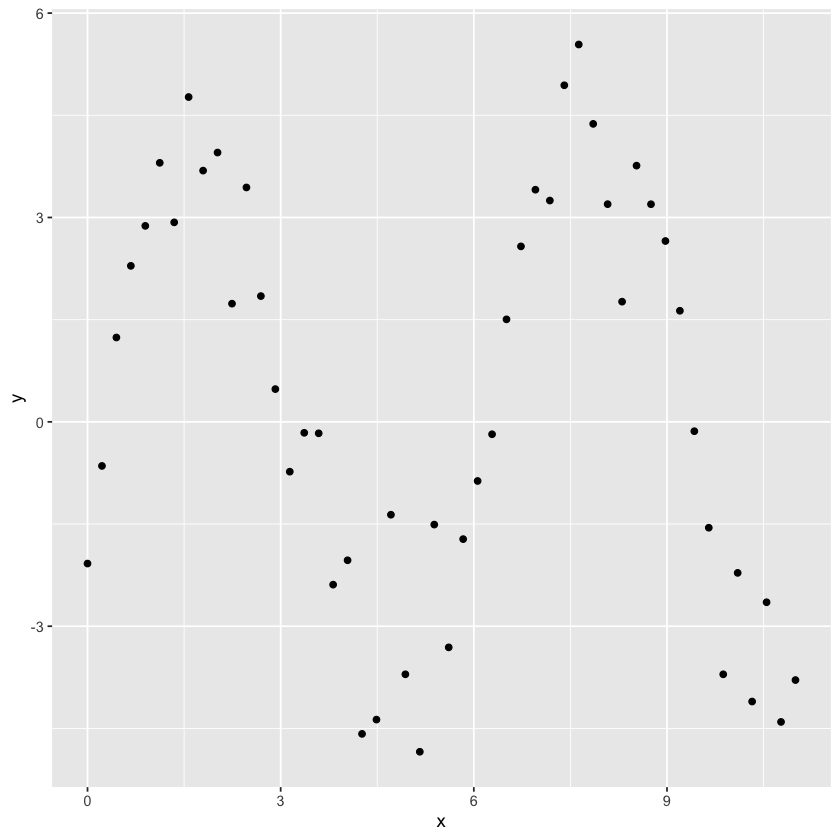

In [68]:
sim5 <- tibble(
  x = seq(0, 3.5 * pi, length = 50),
  y = 4 * sin(x) + rnorm(length(x))
)

ggplot(sim5, aes(x, y)) +
  geom_point()

In [71]:
mod1 <- lm(y ~ poly(x, 1), data = sim5)
mod2 <- lm(y ~ poly(x, 2), data = sim5)
mod3 <- lm(y ~ poly(x, 3), data = sim5)
mod4 <- lm(y ~ poly(x, 4), data = sim5)
mod5 <- lm(y ~ poly(x, 5), data = sim5)

grid <- sim5 %>% 
  data_grid(x = seq_range(x, n = 50, expand = 0.1)) %>% 
  gather_predictions(mod1, mod2, mod3, mod4, mod5, .pred = "y")

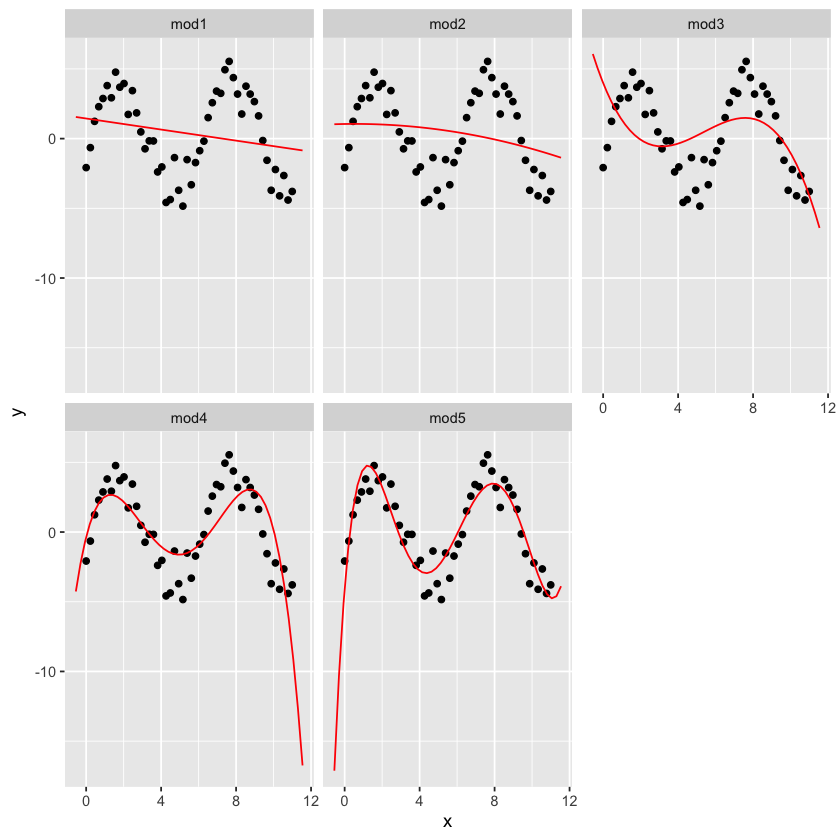

In [72]:
ggplot(sim5, aes(x, y)) + 
  geom_point() +
  geom_line(data = grid, colour = "red") +
  facet_wrap(~ model)

![images](images/slides14.png)